In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
sns.set()

In [ ]:
url = '/content/drive/MyDrive/Colab Notebooks/TAREA_2_ECONOMETRIA_III/Index_modified.csv'
df_comp = pd.read_csv(url)


In [ ]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
raw_csv_data = pd.read_csv(url)
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [ ]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
df_comp['market_value']=df_comp.ftse

In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

#LLR Test

La prueba de razón de verosimilitud es una prueba estadística utilizada para comparar la bondad de ajuste de dos modelos anidados, donde uno de los modelos es una versión restringida del otro. Se basa en la función de verosimilitud, que mide la probabilidad de observar los datos dados los parámetros del modelo.

In [ ]:
def LLR_test(mod_1, mod_2, DF=1): #Calcular la verosimilitud de los dos modelos
    L1 = mod_1.fit().llf  #En este caso, el código utiliza la función .llf()
                          #para extraer el valor de la verosimilitud
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))      #Se calcula la razón de verosimilitudes.
    p = chi2.sf(LR, DF).round(3)
    return p

#The DF Test

La prueba Dickey-Fuller es una prueba estadística utilizada para determinar si una serie temporal tiene una raíz unitaria, lo que indica no estacionariedad. Se suele utilizar para comprobar la presencia de una tendencia en los datos económicos y financieros.

La prueba se basa en el modelo autorregresivo (AR), concretamente en el modelo AR(1), y compara el coeficiente estimado de la variable dependiente retardada con un valor crítico. La hipótesis nula de la prueba es que el coeficiente es igual a 1, lo que indica la presencia de una raíz unitaria.

In [ ]:
sts.adfuller(df.market_value) #La función sts.adfuller() de la biblioteca statsmodels implementa la prueba de Dickey-Fuller aumentada.

(-1.6800956579309974,
 0.44139586545411175,
 6,
 6203,
 {'1%': -3.4314046522931423,
  '5%': -2.8620060621656562,
  '10%': -2.567018082032145},
 67783.9683612964)

#Using returns

In [ ]:
#Cálculo de los rendimientos porcentuales de un conjunto de datos de precios de acciones.
df['returns'] = df.market_value.pct_change(1).mul(100)  #Creación de la columna 'returns' que
#contiene el cambio porcentual en la columna market_value, de una fila a la siguiente.
df = df.iloc[1:] #por motivos de cálculo, se elimina la primera fila.

<ipython-input-51-fca9bc180084>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1).mul(100)


In [ ]:
sts.adfuller(df.returns) #La función sts.adfuller() de la biblioteca statsmodels implementa la prueba de Dickey-Fuller aumentada.

(-15.03075825359335,
 9.910907283617189e-28,
 34,
 6174,
 {'1%': -3.431409608180226,
  '5%': -2.8620082518350323,
  '10%': -2.5670192476469817},
 18877.354625709057)

#ACF and PACF for Returns

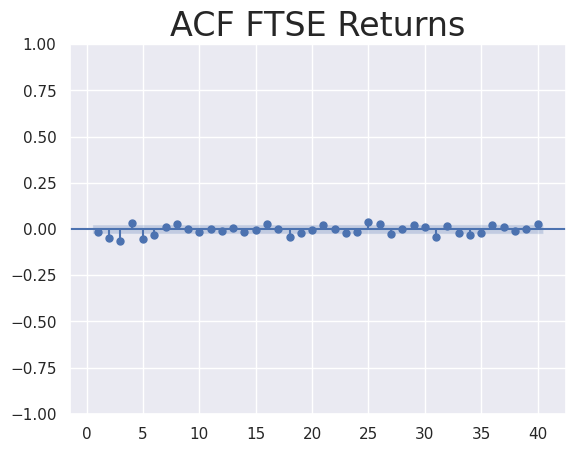

In [ ]:
sgt.plot_acf(df.returns, lags=40, zero = False) #Se implementa la función de autocorrelación,
# de la serie temporal rendimientos de acciones
plt.title("ACF FTSE Returns", size=24)
plt.show()

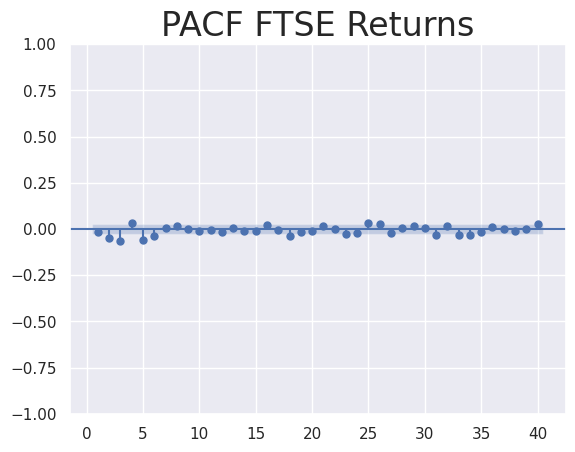

In [ ]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, method = ('ols'))
plt.title("PACF FTSE Returns", size=24)
plt.show()

#AR(1) for Returns

In [ ]:
model_ret_ar_1 = ARIMA(df.returns, order=(1,0, 0))

In [ ]:
results_ret_ar_1 = model_ret_ar_1.fit()

In [ ]:
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6209
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -9522.656
Date:                Sat, 14 Oct 2023   AIC                          19051.312
Time:                        21:07:47   BIC                          19071.513
Sample:                    01-10-1994   HQIC                         19058.315
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.014      1.326      0.185      -0.009       0.047
ar.L1         -0.0176      0.008     -2.331      0.020      -0.032      -0.003
sigma2         1.2580      0.011    112.269      0.000       1.236       1.280
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10186.08
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Higher-Lag AR Models for Returns

In [ ]:
model_ret_ar_2 = ARIMA(df.returns, order = (2,0,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6209
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -9515.361
Date:                Sat, 14 Oct 2023   AIC                          19038.722
Time:                        21:08:21   BIC                          19065.657
Sample:                    01-10-1994   HQIC                         19048.059
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.014      1.381      0.167      -0.008       0.045
ar.L1         -0.0185      0.008     -2.416      0.016      -0.033      -0.003
ar.L2         -0.0484      0.007     -6.909      0.000      -0.062      -0.035
sigma2         1.2550      0.011    111.737      0.000       1.233       1.277
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             10014.84
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.0

In [ ]:
model_ret_ar_3 = ARIMA(df.returns, order = (3,0,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6209
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -9501.148
Date:                Sat, 14 Oct 2023   AIC                          19012.297
Time:                        21:09:01   BIC                          19045.966
Sample:                    01-10-1994   HQIC                         19023.969
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.013      1.447      0.148      -0.007       0.044
ar.L1         -0.0218      0.008     -2.791      0.005      -0.037      -0.006
ar.L2         -0.0497      0.007     -7.128      0.000      -0.063      -0.036
ar.L3         -0.0676      0.007     -9.498      0.000      -0.082      -0.054
sigma2         1.2493      0.012    106.438      0.000       1.226       1.272
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              9058.93
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.0

In [ ]:
model_ret_ar_4 = ARIMA(df.returns, order = (4,0,0))
results_ret_ar_4 = model_ret_ar_4.fit()
print(results_ret_ar_4.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_3, model_ret_ar_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6209
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -9498.313
Date:                Sat, 14 Oct 2023   AIC                          19008.626
Time:                        21:09:39   BIC                          19049.029
Sample:                    01-10-1994   HQIC                         19022.633
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.013      1.397      0.162      -0.008       0.045
ar.L1         -0.0197      0.008     -2.525      0.012      -0.035      -0.004
ar.L2         -0.0482      0.007     -6.880      0.0

In [ ]:
model_ret_ar_5 = ARIMA(df.returns, order = (5,0,0))
results_ret_ar_5 = model_ret_ar_5.fit()
print(results_ret_ar_5.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_4, model_ret_ar_5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6209
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -9487.864
Date:                Sat, 14 Oct 2023   AIC                          18989.729
Time:                        21:10:08   BIC                          19036.865
Sample:                    01-10-1994   HQIC                         19006.070
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.013      1.471      0.141      -0.006       0.044
ar.L1         -0.0180      0.008     -2.247      0.025      -0.034      -0.002
ar.L2         -0.0521      0.007     -7.333      0.0

In [ ]:
model_ret_ar_6 = ARIMA(df.returns, order = (6,0,0))
results_ret_ar_6 = model_ret_ar_6.fit()
print(results_ret_ar_6.summary())
print ("LLR test: " + str(LLR_test(model_ret_ar_5, model_ret_ar_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 6209
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -9483.825
Date:                Sat, 14 Oct 2023   AIC                          18983.651
Time:                        21:10:31   BIC                          19037.521
Sample:                    01-10-1994   HQIC                         19002.326
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.012      1.514      0.130      -0.006       0.043
ar.L1         -0.0201      0.008     -2.458      0.014      -0.036      -0.004
ar.L2         -0.0510      0.007     -7.126      0.0

In [ ]:
model_ret_ar_7 = ARIMA(df.returns, order = (7,0,0))
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6209
Model:                 ARIMA(7, 0, 0)   Log Likelihood               -9483.630
Date:                Sat, 14 Oct 2023   AIC                          18985.260
Time:                        21:11:20   BIC                          19045.863
Sample:                    01-10-1994   HQIC                         19006.269
                         - 10-26-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.013      1.495      0.135      -0.006       0.044
ar.L1         -0.0198      0.008     -2.415      0.016      -0.036      -0.004
ar.L2         -0.0506      0.007     -7.012      0.000      -0.065      -0.036
ar.L3         -0.0724      0.007    -10.036      0.000      -0.087      -0.058
ar.L4          0.0278      0.007      3.732      0.000       0.013       0.042
ar.L5         -0.0582      0.007     -8.105      0.000      -0.072      -0.044
ar.L6         -0.0359      0.008     -4.531      0.000      -0.051      -0.020
ar.L7          0.0079      0.008      0.989      0.323      -0.008       0.024
sigma2         1.2422      0.012    103.598      0.000       1.219       1.266
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8567.66
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print (LLR_test(model_ret_ar_6, model_ret_ar_7))

0.532


#Normalizing Values

In [ ]:
benchmark = df.market_value.iloc[0]

In [ ]:
df['norm'] = df.market_value.div(benchmark).mul(100)

In [ ]:
sts.adfuller(df.norm)

(-1.669394977036219,
 0.4469460568636671,
 6,
 6202,
 {'1%': -3.431404822413956,
  '5%': -2.862006137330532,
  '10%': -2.567018122044246},
 24083.971997382178)

In [ ]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

(-15.030758253593293,
 9.910907283618968e-28,
 34,
 6174,
 {'1%': -3.431409608180226,
  '5%': -2.8620082518350323,
  '10%': -2.5670192476469817},
 98627.71104331779)